## **Chapter 19: Decision Tree**

### **Exercise 1: Classification Animal**

In [1]:
# https://drive.google.com/file/d/1cRWQJz78xw_rRY95YZHeARjnlZaZ_jOq/view?usp=sharing
system('gdown --id 1cRWQJz78xw_rRY95YZHeARjnlZaZ_jOq')

In [2]:
library(rpart)
data <- read.csv("zoo.data.txt", header = FALSE)
print(head(data))
print(paste("Is dataframe?",is.data.frame(data)))

        V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18
1 aardvark  1  0  0  1  0  0  1  1   1   1   0   0   4   0   0   1   1
2 antelope  1  0  0  1  0  0  0  1   1   1   0   0   4   1   0   1   1
3     bass  0  0  1  0  0  1  1  1   1   0   0   1   0   1   0   0   4
4     bear  1  0  0  1  0  0  1  1   1   1   0   0   4   0   0   1   1
5     boar  1  0  0  1  0  0  1  1   1   1   0   0   4   1   0   1   1
6  buffalo  1  0  0  1  0  0  0  1   1   1   0   0   4   1   0   1   1
[1] "Is dataframe? TRUE"


In [3]:
print(paste("cols:", ncol(data)))
print(paste("rows:", nrow(data)))

[1] "cols: 18"
[1] "rows: 101"


In [4]:
summary(data)
str(data)


      V1                  V2               V3              V4        
 Length:101         Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :0.0000   Median :0.000   Median :1.0000  
                    Mean   :0.4257   Mean   :0.198   Mean   :0.5842  
                    3rd Qu.:1.0000   3rd Qu.:0.000   3rd Qu.:1.0000  
                    Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
       V5               V6               V7               V8        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :1.0000  
 Mean   :0.4059   Mean   :0.2376   Mean   :0.3564   Mean   :0.5545  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
       V9             V10  

'data.frame':	101 obs. of  18 variables:
 $ V1 : chr  "aardvark" "antelope" "bass" "bear" ...
 $ V2 : int  1 1 0 1 1 1 1 0 0 1 ...
 $ V3 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ V4 : int  0 0 1 0 0 0 0 1 1 0 ...
 $ V5 : int  1 1 0 1 1 1 1 0 0 1 ...
 $ V6 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ V7 : int  0 0 1 0 0 0 0 1 1 0 ...
 $ V8 : int  1 0 1 1 1 0 0 0 1 0 ...
 $ V9 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ V10: int  1 1 1 1 1 1 1 1 1 1 ...
 $ V11: int  1 1 0 1 1 1 1 0 0 1 ...
 $ V12: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V13: int  0 0 1 0 0 0 0 1 1 0 ...
 $ V14: int  4 4 0 4 4 4 4 0 0 4 ...
 $ V15: int  0 1 1 0 1 1 1 1 1 0 ...
 $ V16: int  0 0 0 0 0 0 1 1 0 1 ...
 $ V17: int  1 1 0 1 1 1 1 0 0 0 ...
 $ V18: int  1 1 4 1 1 1 1 4 4 1 ...


In [6]:
# Column 18: type
data <- subset(data, select=-V1)
print(head(data))

  V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18
1  1  0  0  1  0  0  1  1   1   1   0   0   4   0   0   1   1
2  1  0  0  1  0  0  0  1   1   1   0   0   4   1   0   1   1
3  0  0  1  0  0  1  1  1   1   0   0   1   0   1   0   0   4
4  1  0  0  1  0  0  1  1   1   1   0   0   4   0   0   1   1
5  1  0  0  1  0  0  1  1   1   1   0   0   4   1   0   1   1
6  1  0  0  1  0  0  0  1   1   1   0   0   4   1   0   1   1


In [7]:
# Create the training and test data
set.seed(42) 
trainingRowIndex <- sample(1:nrow(data), 0.75*nrow(data)) 
print("Selected training row indexes:")
print(trainingRowIndex)
trainingData <- data[trainingRowIndex, ] # training data
testData <- data[-trainingRowIndex, ] # test data
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))


[1] "Selected training row indexes:"
 [1]  49  65  25  74  18 101  47  24  71  89  37  20  26   3  41  27  36   5  34
[20]  88  58  42  94  30  43  15  22  81   8  85  68  97  69   4  50  96  92  67
[39]   6  63   2  52  82  54  21  61  55  38  10  40  84  33  66  39  72  45  80
[58]   9  29  12  90  44  35  77  16  28  51  95  56  70  79  17  32  48  14
[1] "Rows of training data and test data:"
[1] 75
[1] 26


In [8]:
# Create the training and test data
set.seed(42) 
trainingRowIndex <- sample(1:nrow(data), 0.75*nrow(data)) 
print("Selected training row indexes:")
print(trainingRowIndex)
trainingData <- data[trainingRowIndex, ] # training data
testData <- data[-trainingRowIndex, ] # test data
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))


[1] "Selected training row indexes:"
 [1]  49  65  25  74  18 101  47  24  71  89  37  20  26   3  41  27  36   5  34
[20]  88  58  42  94  30  43  15  22  81   8  85  68  97  69   4  50  96  92  67
[39]   6  63   2  52  82  54  21  61  55  38  10  40  84  33  66  39  72  45  80
[58]   9  29  12  90  44  35  77  16  28  51  95  56  70  79  17  32  48  14
[1] "Rows of training data and test data:"
[1] 75
[1] 26


In [9]:
# Build model
#use: control = list(maxdepth = 15)
data.tree <- rpart(V18 ~ V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17,
                data = trainingData, 
                method="class", 
                minbucket=1)
print(data.tree)


n= 75 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 75 43 1 (0.43 0.23 0.053 0.093 0.04 0.08 0.08)  
    2) V5>=0.5 32  0 1 (1 0 0 0 0 0 0) *
    3) V5< 0.5 43 26 2 (0 0.4 0.093 0.16 0.07 0.14 0.14)  
      6) V3>=0.5 17  0 2 (0 1 0 0 0 0 0) *
      7) V3< 0.5 26 19 4 (0 0 0.15 0.27 0.12 0.23 0.23)  
       14) V13>=0.5 7  0 4 (0 0 0 1 0 0 0) *
       15) V13< 0.5 19 13 6 (0 0 0.21 0 0.16 0.32 0.32)  
         30) V9>=0.5 7  3 3 (0 0 0.57 0 0.43 0 0)  
           60) V15>=0.5 4  0 3 (0 0 1 0 0 0 0) *
           61) V15< 0.5 3  0 5 (0 0 0 0 1 0 0) *
         31) V9< 0.5 12  6 6 (0 0 0 0 0 0.5 0.5)  
           62) V11>=0.5 7  1 6 (0 0 0 0 0 0.86 0.14)  
            124) V14>=3 6  0 6 (0 0 0 0 0 1 0) *
            125) V14< 3 1  0 7 (0 0 0 0 0 0 1) *
           63) V11< 0.5 5  0 7 (0 0 0 0 0 0 1) *


In [11]:
install.packages('rpart.plot')
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



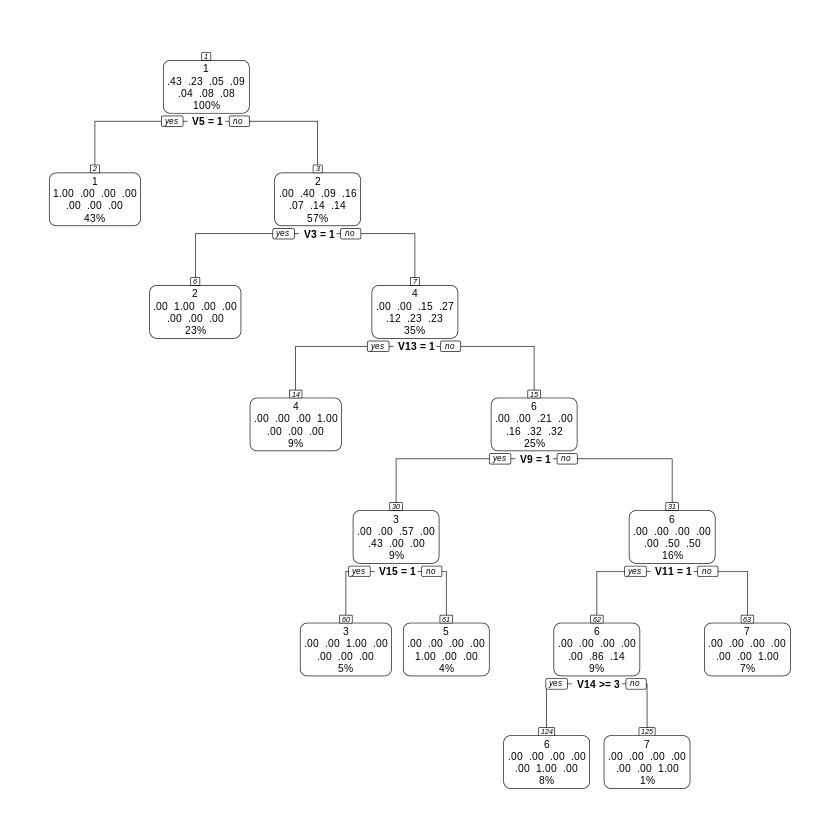

In [12]:
# draw tree
prp(data.tree,type=2,extra="auto",nn = TRUE,branch=1,varlen=0,yesno=2)


In [13]:
#test model
pred_new = predict(data.tree, testData, type = "class")

In [14]:
print("Predict vs Actual:")
result <- data.frame(Predict = pred_new, Actual = testData$V18)
print(result)

[1] "Predict vs Actual:"
    Predict Actual
1         1      1
7         1      1
11        1      1
13        4      4
19        4      4
23        1      1
31        6      6
46        1      1
53        3      5
57        2      2
59        2      2
60        2      2
62        4      4
64        1      1
73        6      7
75        1      1
76        1      1
78        7      7
83        4      4
86        7      7
87        4      4
91        6      3
93        4      4
98        6      6
99        1      1
100       7      7


In [15]:
# SOLUTION 2
misClasificError <- mean(pred_new != testData$V18)
print(paste('Accuracy s2: ',1-misClasificError))

[1] "Accuracy s2:  0.884615384615385"


In [16]:
# prediction new values
newCase <- data[c(1,10, 100),]
print(newCase$V18)
newCase$V18 <- NULL
print(newCase)

[1] 1 1 7
    V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17
1    1  0  0  1  0  0  1  1   1   1   0   0   4   0   0   1
10   1  0  0  1  0  0  0  1   1   1   0   0   4   0   1   0
100  0  0  1  0  0  0  0  0   0   1   0   0   0   0   0   0


In [17]:
print("New predictions:")
pred_new = predict(data.tree, newCase, type = "class")
print(pred_new)

[1] "New predictions:"
  1  10 100 
  1   1   7 
Levels: 1 2 3 4 5 6 7


In [18]:
newdata = data.frame(V2 = c(1, 1), 
                    V3 = c(0, 0), 
                    V4 = c(0, 1),
                    V5 = c(1, 0),
                    V6 = c(0, 1), 
                    V7 = c(0, 0), 
                    V8 = c(1, 0),
                    V9 = c(1, 0),
                    V10 = c(1, 0), 
                    V11 = c(0, 1), 
                    V12 = c(0, 1),
                    V13 = c(0, 0),
                    V14 = c(4, 6), 
                    V15 = c(0, 0), 
                    V16 = c(0, 0),
                    V17 = c(1, 0)) 
print("New predictions:")
pred_new = predict(data.tree, newdata, type = "class")
print(pred_new)


[1] "New predictions:"
1 2 
1 6 
Levels: 1 2 3 4 5 6 7
